In [1]:
# Let's Import ...

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
ds = pd.read_csv('winequality-red.csv')
df = pd.DataFrame(ds)
df = shuffle(df)
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
df['quality'].describe()

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

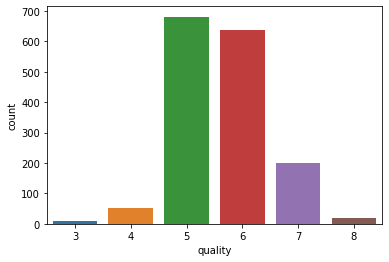

In [5]:
#count of each target variable
from collections import Counter
Counter(df['quality'])

#count of the target variable
sns.countplot(x='quality', data=df)

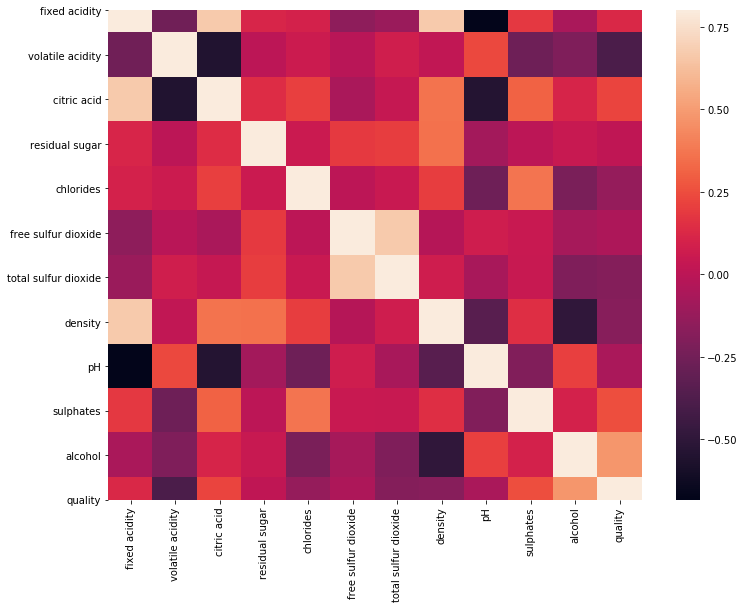

In [6]:
#Heatmap for correlation
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

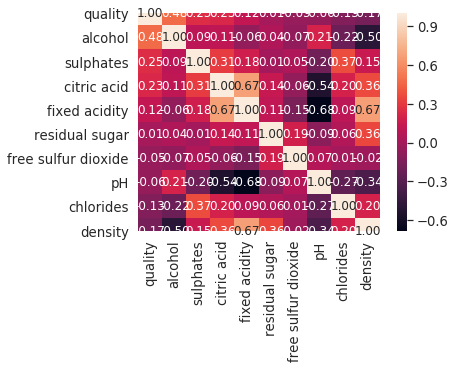

In [7]:
k = 10
cols = corrmat.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.20)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

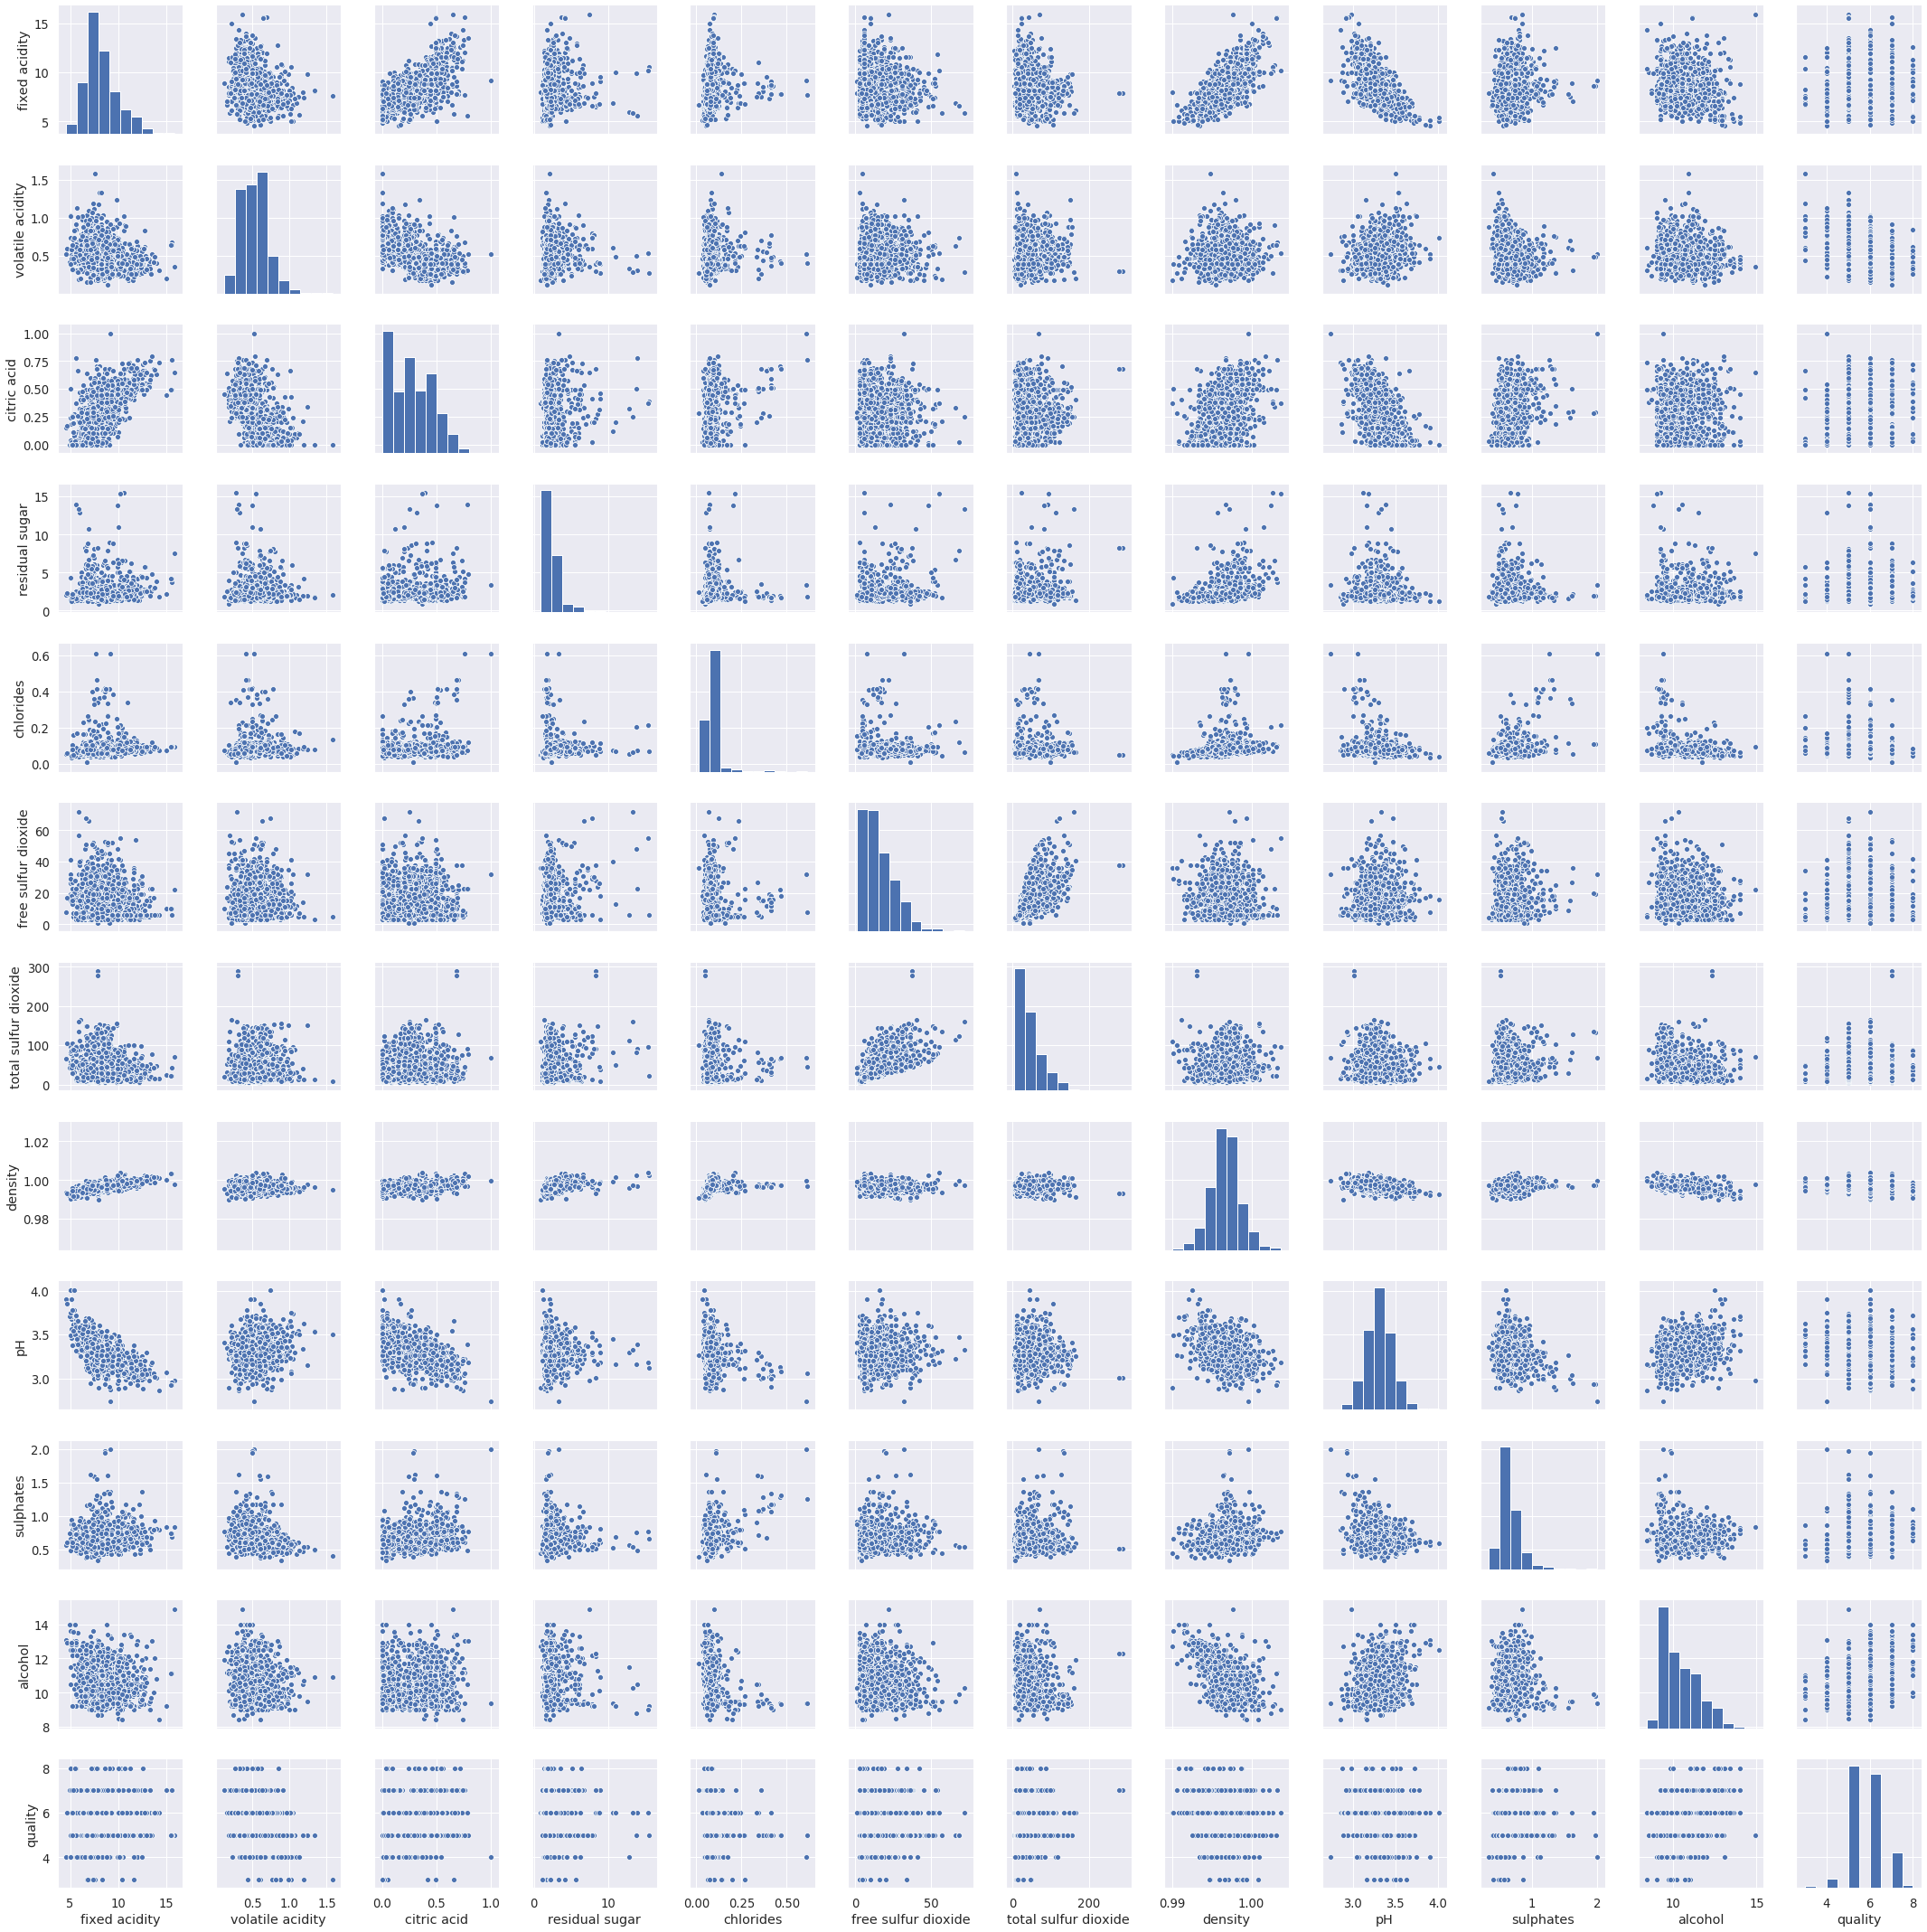

In [8]:
sns.pairplot(df)

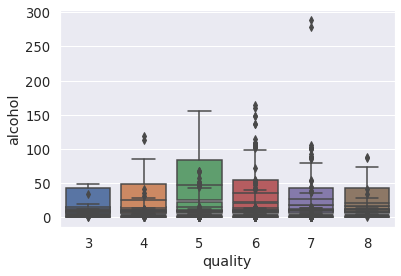

In [9]:
# use box and whisker plots for outliers

#Plot a boxplot to check for Outliers
#Target variable is Quality. So will plot a boxplot each column against target variable
sns.boxplot('quality', 'fixed acidity', data = df)
sns.boxplot('quality', 'citric acid', data = df)
sns.boxplot('quality', 'residual sugar', data = df)
sns.boxplot('quality', 'chlorides', data = df)
sns.boxplot('quality', 'free sulfur dioxide', data = df)
sns.boxplot('quality', 'total sulfur dioxide', data = df)
sns.boxplot('quality', 'density', data = df)
sns.boxplot('quality', 'pH', data = df)
sns.boxplot('quality', 'sulphates', data = df)
sns.boxplot('quality', 'alcohol', data = df)


In [10]:
#boxplots show many outliers for quite a few columns. Describe the dataset to get a better idea on what's happening

df.describe()

#fixed acidity - 25% - 7.1 and 50% - 7.9. Not much of a variance. Could explain the huge number of outliers
#volatile acididty - similar reasoning
#citric acid - seems to be somewhat uniformly distributed
#residual sugar - min - 0.9, max - 15!! Waaaaay too much difference. Could explain the outliers.
#chlorides - same as residual sugar. Min - 0.012, max - 0.611
#free sulfur dioxide, total suflur dioxide - same explanation as above

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['Reviews'] = reviews

In [12]:
#view final data
df.columns

df['Reviews'].unique()

Counter(df['Reviews'])

x = df.iloc[:,:11]
y = df['Reviews']

In [13]:
# MODELLING THE DATA
# Scale the data using Standard Scaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [14]:
#view the scaled features
print(x)

[[ 0.04617083 -0.8816606   0.81659759 ... -0.91431164  0.8961204
   0.72936437]
 [-0.70071875  1.2412005  -1.34012182 ...  0.51112954 -1.52341575
   2.23124036]
 [-1.90723268 -0.82579583 -1.34012182 ...  2.51970576  0.54204194
   3.35764735]
 ...
 [ 0.21852997  0.90601191  0.20039205 ...  1.09426457  0.48302886
   1.10483337]
 [-0.58581266  0.79428237 -1.13471997 ...  0.57592232 -0.16611498
  -0.30317536]
 [ 0.27598301  0.45909378  0.14904159 ... -0.33117661 -0.87427191
  -1.05411336]]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [16]:
# Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.98      1.00      0.99       391
           3       1.00      0.20      0.33         5

    accuracy                           0.98       400
   macro avg       0.66      0.40      0.44       400
weighted avg       0.97      0.98      0.97       400

[[  0   4   0]
 [  0 391   0]
 [  0   4   1]]


In [17]:
#  Stochastic Gradient Decent Classifier

sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

print(classification_report(y_test, pred_sgd))

print(confusion_matrix(y_test, pred_sgd))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.98      1.00      0.99       391
           3       0.00      0.00      0.00         5

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.96      0.98      0.97       400

[[  0   4   0]
 [  0 391   0]
 [  0   5   0]]


In [18]:
# Support Vector Classifier

svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.98      1.00      0.99       391
           3       0.00      0.00      0.00         5

    accuracy                           0.98       400
   macro avg       0.33      0.33      0.33       400
weighted avg       0.96      0.98      0.97       400

